
🎯 Accuracy: 85.92%

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.87      0.85      1556
    Positive       0.88      0.85      0.86      1717

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



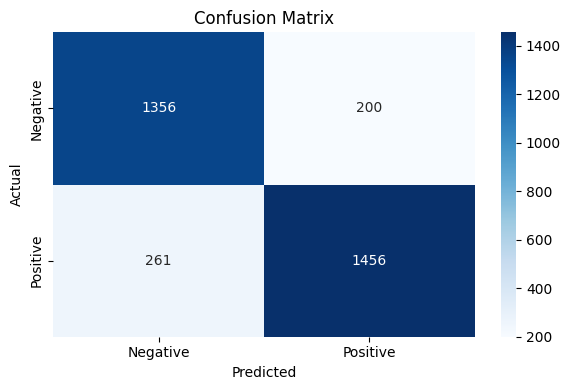

💬 "This product is amazing! Totally recommend." → Positive
💬 "Worst service I've ever received." → Negative
💬 "Nothing special, just okay." → Positive


In [4]:
# ✅ Import Libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load and Clean Dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')
df = df[['text', 'sentiment']]
df = df[df['sentiment'].isin(['positive', 'negative'])]  
df.dropna(inplace=True)

# ✅ Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)        
    text = re.sub(r"@\w+|#\w+", "", text)       
    text = re.sub(r"[^a-z\s]", "", text)        
    text = re.sub(r"\s+", " ", text).strip()    
    return text

df['text'] = df['text'].apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})  

# ✅ Split Data
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ TF-IDF Vectorizer (Improved)
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 3),      
    max_features=8000,
    min_df=3,
    max_df=0.8
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ✅Train SVM Classifier
model = LinearSVC(class_weight='balanced')  
model.fit(X_train_vec, y_train)

# ✅ Evaluate
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ✅ Custom Predictions
samples = [
    "This product is amazing! Totally recommend.",
    "Worst service I've ever received.",
    "Nothing special, just okay."
]
sample_vec = vectorizer.transform(samples)
sample_preds = model.predict(sample_vec)

for text, pred in zip(samples, sample_preds):
    print(f"💬 \"{text}\" → {'Positive' if pred == 1 else 'Negative'}")
